In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data_raw = pd.read_csv('./csv/bikes.csv',index_col='datetime',parse_dates=True)
data_raw['hora']=data_raw.index.hour
data_raw.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hora
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [113]:
data_raw.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hora
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


In [114]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  hora        10886 non-null  int32  
dtypes: float64(3), int32(1), int64(8)
memory usage: 1.0 MB


In [115]:
data_raw.isna().any().any()


np.False_

In [116]:
bikes_dummies=pd.get_dummies(data_raw.index.hour,drop_first=False,dtype=int)
bikes_dummies.head(24)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [117]:
bikes_dummies.index = data_raw.index
bikes_dummies.head(24)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 05:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 06:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 07:00:00,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 08:00:00,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
a = np.array(((data_raw.index.hour)>=7)&(data_raw.index.hour<=20))
data_raw['dia']=a.astype(int)
data_raw['dia'].sample(5)

datetime
2012-12-05 19:00:00    1
2011-08-09 04:00:00    0
2011-03-19 07:00:00    1
2012-11-12 23:00:00    0
2012-02-07 10:00:00    1
Name: dia, dtype: int64

In [119]:
data_hour_dummies = pd.concat([data_raw,bikes_dummies],axis=1)
data_hour_dummies.head(24)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,...,0,0,0,0,0,0,0,0,0,0


In [120]:
data_hour_dummies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  hora        10886 non-null  int32  
 12  dia         10886 non-null  int64  
 13  0           10886 non-null  int64  
 14  1           10886 non-null  int64  
 15  2           10886 non-null  int64  
 16  3           10886 non-null  int64  
 17  4           10886 non-null  int64  
 18  5           10886 non-null  int

In [121]:
data_hour_dummies.dia

datetime
2011-01-01 00:00:00    0
2011-01-01 01:00:00    0
2011-01-01 02:00:00    0
2011-01-01 03:00:00    0
2011-01-01 04:00:00    0
                      ..
2012-12-19 19:00:00    1
2012-12-19 20:00:00    1
2012-12-19 21:00:00    0
2012-12-19 22:00:00    0
2012-12-19 23:00:00    0
Name: dia, Length: 10886, dtype: int64

In [122]:
bikes=data_hour_dummies
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [123]:
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,14,15,16,17,18,19,20,21,22,23
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,...,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239,-0.001239
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,...,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,...,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,...,-0.000581,-0.001304,-0.012156,-0.002028,0.001590,-0.016497,-0.017944,-0.013603,-0.014327,-0.001304
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,...,0.078261,0.081880,0.077489,0.065038,0.050367,0.030436,0.013931,-0.000354,-0.012467,-0.023808
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,...,0.075487,0.078396,0.073191,0.060075,0.047119,0.029169,0.015231,0.001621,-0.010430,-0.021702
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,...,-0.146758,-0.150047,-0.145353,-0.124575,-0.100366,-0.059264,-0.027645,0.005666,0.029136,0.051748
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,...,0.076080,0.079278,0.085403,0.077874,0.063611,0.036765,0.007613,-0.019514,-0.024450,-0.044105
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,...,0.169792,0.167442,0.163486,0.164982,0.106204,0.054630,0.002974,-0.031198,-0.056163,-0.086048
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,...,0.015645,0.031451,0.118697,0.329179,0.296144,0.153190,0.050162,-0.014882,-0.061716,-0.112840


<Axes: >

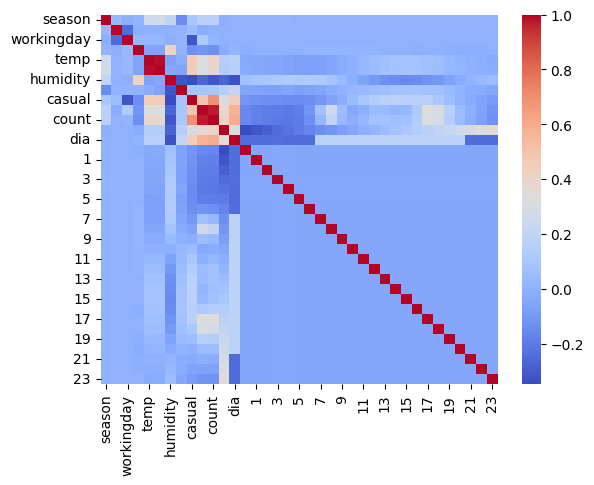

In [124]:
sns.heatmap(bikes.corr(),cmap='coolwarm')

In [125]:
feats=['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count','hora','dia']

<Axes: title={'center': 'Correlation Heatmap'}>

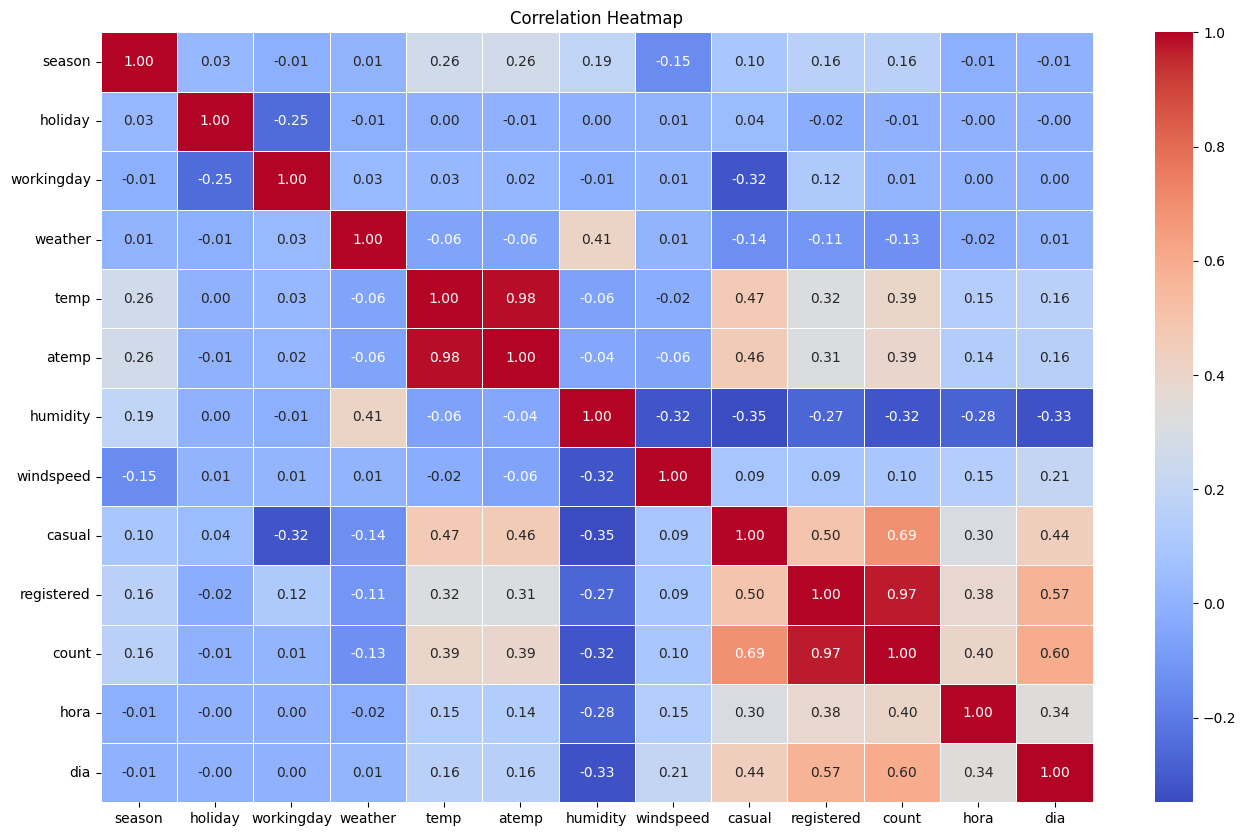

In [126]:
plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap')
sns.heatmap(bikes[feats].corr(),cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)


<Axes: title={'center': 'Absolute Correlation Heatmap'}>

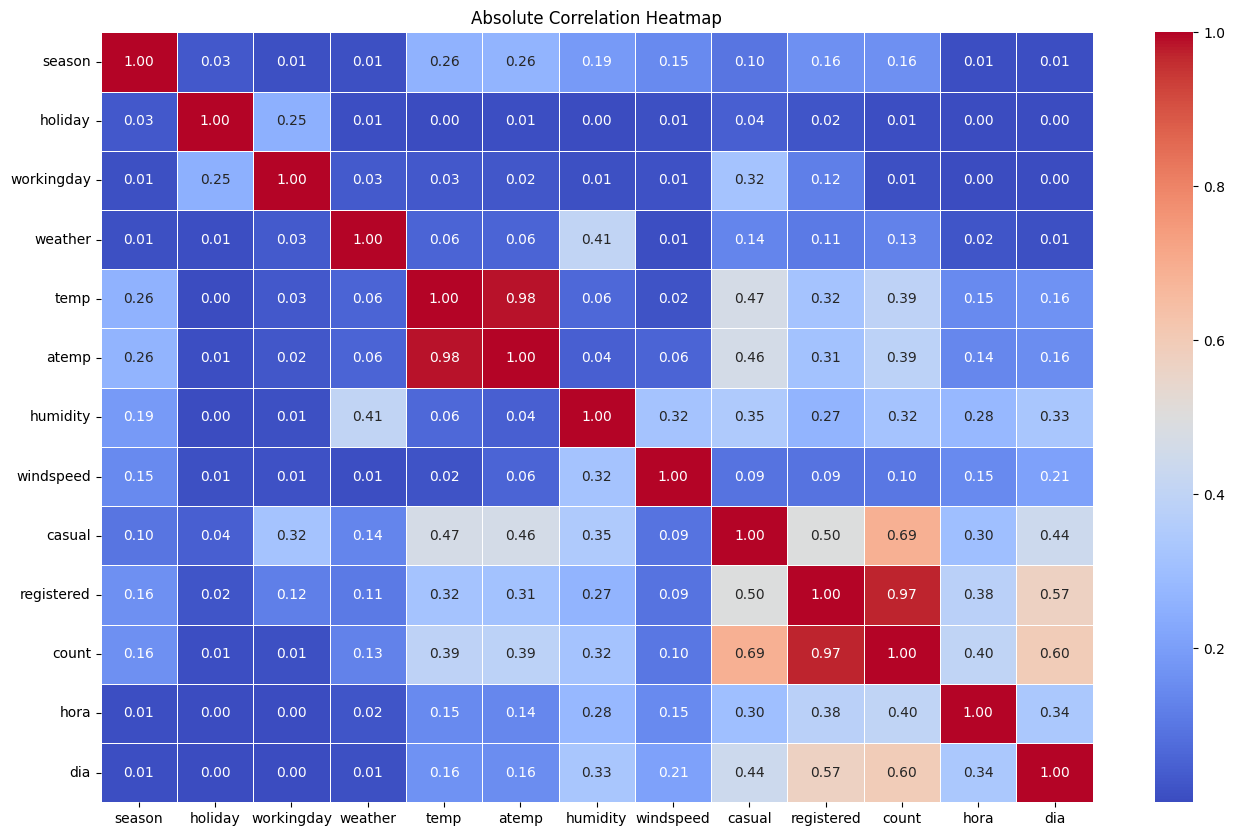

In [127]:
plt.figure(figsize=(16,10))
plt.title('Absolute Correlation Heatmap')
sns.heatmap(abs(bikes[feats].corr()),cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

In [128]:
umbral = 0.33
correlaciones_significativas = []
best_corr = []

for feature in feats:
    corr = bikes[feature].corr(bikes['count'])
    if abs(corr) > umbral:
        correlaciones_significativas.append((feature, corr))

for f, c in correlaciones_significativas:
    best_corr.append((f))
    print(f"{f}: correlación = {c:.3f}")

print(best_corr)

temp: correlación = 0.394
atemp: correlación = 0.390
casual: correlación = 0.690
registered: correlación = 0.971
count: correlación = 1.000
hora: correlación = 0.401
dia: correlación = 0.598
['temp', 'atemp', 'casual', 'registered', 'count', 'hora', 'dia']


<Axes: >

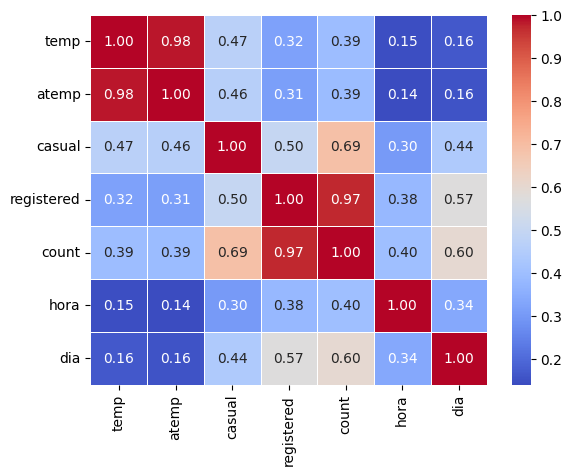

In [129]:
sns.heatmap(bikes[best_corr].corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)

In [130]:
best_features = ['atemp', 'casual', 'registered', 'hora', 'dia']

f00= ['atemp', 'casual', 'registered', 'hora']
f01= ['atemp', 'casual', 'registered']
f02= ['atemp', 'casual', 'hora']
f03= ['atemp', 'registered', 'hora']

f04= ['atemp', 'casual', 'registered', 'dia']
f05= ['atemp', 'casual', 'registered']
f06= ['atemp', 'casual', 'dia']
f07= ['atemp', 'registered', 'dia']

f08= ['atemp', 'casual', 'hora', 'dia']
f09= ['atemp', 'casual', 'hora']
f10= ['atemp', 'casual', 'dia']
f11= ['atemp', 'hora', 'dia']

f12= ['atemp', 'registered', 'hora', 'dia']
f13= ['atemp', 'registered', 'hora']
f14= ['atemp', 'registered', 'dia']
f15= ['atemp', 'hora', 'dia']

f16= ['casual', 'registered', 'hora', 'dia']
f17= ['casual', 'registered', 'hora']
f18= ['casual', 'registered', 'dia']
f19= ['casual', 'hora', 'dia']

f20= ['atemp', 'casual']
f21= ['atemp','registered']
f22= ['atemp','hora']
f23= ['atemp','dia']
f24= ['casual', 'registered']
f25= ['casual','hora',]
f26= ['casual','dia']
f27= ['registered', 'hora']
f28= ['registered','dia']
f29= ['hora', 'dia']

feats_comb = [best_features, f00, f01, f02, f03, f04, f05, f06, f07,
              f08, f09, f10, f11, f12, f13, f14, f15,
             f16, f17, f18, f19, f20, f21, f22, f23,
             f24, f25, f26, f27, f28, f29]
print(feats_comb)



[['atemp', 'casual', 'registered', 'hora', 'dia'], ['atemp', 'casual', 'registered', 'hora'], ['atemp', 'casual', 'registered'], ['atemp', 'casual', 'hora'], ['atemp', 'registered', 'hora'], ['atemp', 'casual', 'registered', 'dia'], ['atemp', 'casual', 'registered'], ['atemp', 'casual', 'dia'], ['atemp', 'registered', 'dia'], ['atemp', 'casual', 'hora', 'dia'], ['atemp', 'casual', 'hora'], ['atemp', 'casual', 'dia'], ['atemp', 'hora', 'dia'], ['atemp', 'registered', 'hora', 'dia'], ['atemp', 'registered', 'hora'], ['atemp', 'registered', 'dia'], ['atemp', 'hora', 'dia'], ['casual', 'registered', 'hora', 'dia'], ['casual', 'registered', 'hora'], ['casual', 'registered', 'dia'], ['casual', 'hora', 'dia'], ['atemp', 'casual'], ['atemp', 'registered'], ['atemp', 'hora'], ['atemp', 'dia'], ['casual', 'registered'], ['casual', 'hora'], ['casual', 'dia'], ['registered', 'hora'], ['registered', 'dia'], ['hora', 'dia']]


In [147]:
X = bikes.drop('count', axis=1)
y = pd.DataFrame(bikes['count'])
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [148]:
y.head()

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1


In [142]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [149]:
def try_features(X, y, feats):
    X_train, X_test, y_train, y_test = train_test_split(X[feats], y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Features: {feats}")
    print(f"R^2 Score: {model.score(X_test, y_test):.3f}")
    print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.3f}")
    print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.3f}")
    print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}\n")
    

def try_all_features(X, y, feats_comb):
    for feats in feats_comb:
        try_features(X, y, feats)
        sns.scatterplot(x=y_test['count'], y=y_pred.flatten())


In [144]:
try_all_features(X, y, feats_comb)

Features: ['atemp', 'casual', 'registered', 'hora', 'dia']
R^2 Score: 1.000
Mean Absolute Error: 0.000
Mean Squared Error: 0.000
Root Mean Squared Error: 0.000

Features: ['atemp', 'casual', 'registered', 'hora']
R^2 Score: 1.000
Mean Absolute Error: 0.000
Mean Squared Error: 0.000
Root Mean Squared Error: 0.000

Features: ['atemp', 'casual', 'registered']
R^2 Score: 1.000
Mean Absolute Error: 0.000
Mean Squared Error: 0.000
Root Mean Squared Error: 0.000

Features: ['atemp', 'casual', 'hora']
R^2 Score: 0.542
Mean Absolute Error: 83.740
Mean Squared Error: 15123.930
Root Mean Squared Error: 122.979

Features: ['atemp', 'registered', 'hora']
R^2 Score: 0.951
Mean Absolute Error: 24.916
Mean Squared Error: 1632.846
Root Mean Squared Error: 40.408

Features: ['atemp', 'casual', 'registered', 'dia']
R^2 Score: 1.000
Mean Absolute Error: 0.000
Mean Squared Error: 0.000
Root Mean Squared Error: 0.000

Features: ['atemp', 'casual', 'registered']
R^2 Score: 1.000
Mean Absolute Error: 0.000
Me